In [1]:
%matplotlib inline
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import tarfile
import os
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import pickle

We have decided to use the CIFAR10 dataset as default. However, this notebook also supports downloading/preprocessing and training the model with the SVHN dataset. Just change the variable bellow to the dataset of your choice.

In [2]:
use_dataset = "cifar10" # change to svhn if you want

The [Street View House Numbers](http://ufldl.stanford.edu/housenumbers/) SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with minimal requirement on data preprocessing and formatting.

In [3]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

data_dir = './data/'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not os.path.exists(data_dir):
    os.makedirs(data_dir)

def download_and_extract_if_necessary(url, filename):
    """
    Download the given dataset by url and filename and extract it if necessary.
    """
    if not isfile(data_dir + filename):
        with DLProgress(unit='B', unit_scale=True, miniters=1, desc=filename + " Dataset.") as pbar:
            urlretrieve(
                url,
                data_dir + filename,
                pbar.hook)
    else:
        print("Dataset: " + filename + " is already downloaded.")

    if use_dataset == "cifar10":
        with tarfile.open(data_dir + filename) as tar:
            tar.extractall(path=data_dir)
            tar.close()

Now it's time to actually load the cifar10 dataset into python. Note that the *load_cifar10_batch()* function does not return the dataset labels. Since we are not trying to classify these images based on their real classes, those are not necessary.

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

def load_cifar10_batch(cifar10_dataset_folder_path, batch_id):
    """
    Load a batch of the dataset
    """
    with open(cifar10_dataset_folder_path + '/data_batch_' + str(batch_id), mode='rb') as file:
        batch = pickle.load(file, encoding='latin1')

    features = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    return features

In [5]:
if use_dataset == "cifar10":
    cifar10_dataset_url = 'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz'
    cifar10_dataset_filename = 'cifar-10-python.tar.gz'
    cifar10_dataset_folder_path = 'cifar-10-batches-py'
    download_and_extract_if_necessary(cifar10_dataset_url, cifar10_dataset_filename)
    
elif use_dataset == "svhn":
    svhn_dataset_training_url = 'http://ufldl.stanford.edu/housenumbers/train_32x32.mat'
    svhn_dataset_training_filename = 'train_32x32.mat'

    svhn_dataset_testing_url = 'http://ufldl.stanford.edu/housenumbers/test_32x32.mat'
    svhn_dataset_testing_filename = 'test_32x32.mat'

    download_and_extract_if_necessary(svhn_dataset_training_url, svhn_dataset_training_filename)
    download_and_extract_if_necessary(svhn_dataset_testing_url, svhn_dataset_testing_filename)

Dataset: cifar-10-python.tar.gz is already downloaded.


Note that since the SVHN dataset originally have a .mat (matlab) extension format, we have to make use of the scipy.io.loadmat routine which will allow us to use the dataset normally from python.

In [6]:
training_set = None
if use_dataset == "cifar10":
    training_set = load_cifar10_batch(data_dir + cifar10_dataset_folder_path, 1)
elif use_dataset == "svhn":
    train_set = loadmat(data_dir + svhn_dataset_training_filename)
    #testset = loadmat(data_dir + svhn_dataset_testing_filename)
    
    # transpose the SVHN dataset to comply with the CIFAR10 dataset shape 
    training_set = train_set['X'].transpose(3, 0, 1, 2)
    #testset = testset['X'].transpose(3, 0, 1, 2)

print(training_set.shape)

(10000, 32, 32, 3)


In [8]:
def display_images(data):
    idx = np.random.randint(0, data.shape[0], size=36)
    fig, axes = plt.subplots(6, 6, sharex=True, sharey=True, figsize=(7,7),)
    for ii, ax in zip(idx, axes.flatten()):
        ax.imshow(data[ii,:,:,:], aspect='equal')
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
    plt.subplots_adjust(wspace=0, hspace=0)

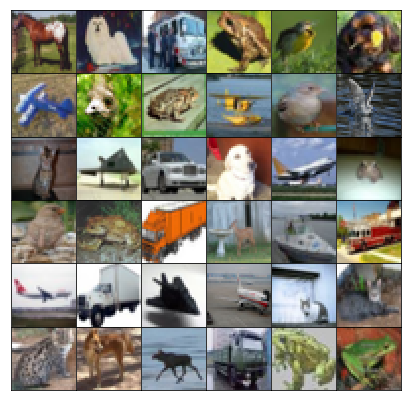

In [10]:
display_images(training_set)